In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={"figure.figsize": (10, 7)})


In [2]:
# Raw data
events_data = pd.read_csv(
    r"D:\Projects\PythonProjects\DS-Rush\data\stepik\event_data_train.csv")
submissions_data = pd.read_csv(
    r"D:\Projects\PythonProjects\DS-Rush\data\stepik\submissions_data_train.csv")


In [3]:
events_data


,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [4]:
events_data.describe()


,step_id,timestamp,user_id
count,3.480703e+06,3.480703e+06,3.480703e+06
mean,3.487358e+04,1.480288e+09,1.331468e+04
std,1.422243e+04,3.068906e+07,7.779099e+03
min,3.045600e+04,1.434341e+09,1.000000e+00
25%,3.217900e+04,1.450271e+09,6.642000e+03
50%,3.292900e+04,1.483904e+09,1.320800e+04
75%,3.348100e+04,1.507889e+09,2.014400e+04
max,1.584330e+05,1.526773e+09,2.679800e+04


In [5]:
events_data.action.unique()


array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [6]:
events_data["date"] = pd.to_datetime(events_data.timestamp, unit="s")
events_data.head(10)


,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [7]:
print(events_data.date.min())
print(events_data.date.max())


2015-06-15 04:00:48
2018-05-19 23:33:31


In [8]:
events_data["day"] = events_data.date.dt.date
events_data.head()


,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:xlabel='day'>

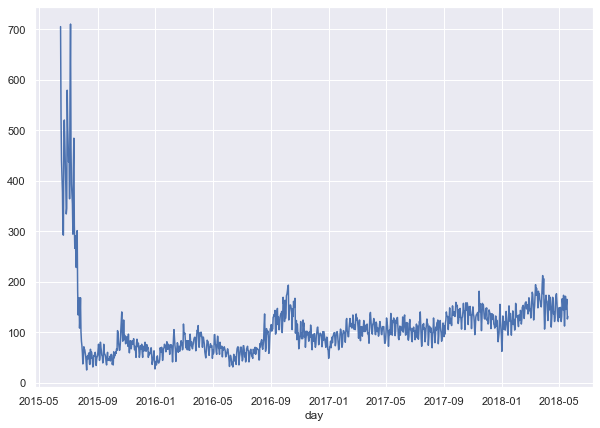

In [9]:
events_data.groupby("day").user_id.nunique().plot()


In [10]:
# Wrong solution
# events_data[events_data.action == "passed"]\
#     .groupby("user_id", as_index=False)\
#     .aggregate({"step_id": "count"})\
#     .rename(columns={"step_id": "passed_step"}).passed_step.hist()


In [11]:
events_data.pivot_table(index="user_id", columns="action",
                        values="step_id", aggfunc="count", fill_value=0)


action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [34]:
users_events_data = events_data.pivot_table(index="user_id",
                        columns="action",
                        values="step_id",
                        aggfunc="count",
                        fill_value=0).reset_index()


In [35]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [13]:
submissions_data.head()


,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [14]:
submissions_data["date"] = pd.to_datetime(submissions_data.timestamp, unit="s")
submissions_data["day"] = submissions_data.date.dt.date
submissions_data.head()


,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [15]:
user_scores = submissions_data.pivot_table(index="user_id", columns="submission_status", values="step_id",
                        aggfunc="count", fill_value=0).reset_index()


In [16]:
user_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [17]:
gap_data = events_data[["user_id", "day", "timestamp"]].drop_duplicates(subset=["user_id", "day"])\
    .groupby("user_id")["timestamp"].apply(list).apply(np.diff).values

<AxesSubplot:>

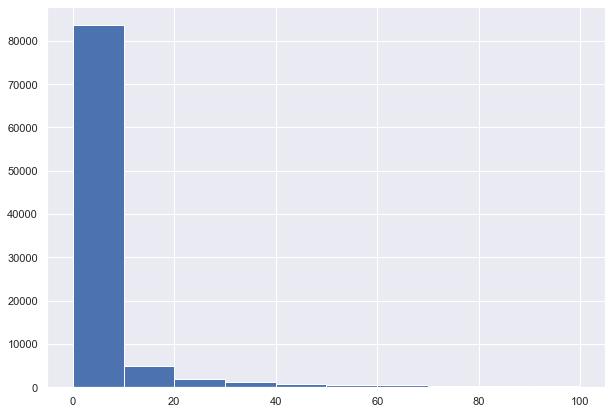

In [18]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data = gap_data / (24 * 60 * 60)
gap_data[gap_data < 100].hist()

In [19]:
gap_data.quantile(0.90)

18.325995370370403

In [20]:
# user_scores.sort_values("correct")

In [21]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [22]:
now = 1526772811
drop_out_treshold = 30 * 24 * 60 * 60

In [23]:
users_data = events_data.groupby("user_id", as_index=False).agg({"timestamp": "max"}).rename(columns={"timestamp": "last_timestamp"})
users_data.head()

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [24]:
max_valid_time = 30 * 24 * 60 * 60
max_valid_time

2592000

In [25]:
users_data["is_gone_user"] = (now - users_data.last_timestamp) > drop_out_treshold

In [30]:
users_data = users_data.merge(user_scores, how="outer", on="user_id")

In [32]:
users_data.fillna(0, inplace=True)

In [33]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [36]:
users_data = users_data.merge(users_events_data, how="outer")

In [39]:
users_days = events_data.groupby("user_id").day.nunique().to_frame().reset_index()
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [40]:
users_data = users_data.merge(users_days, how="outer", on="user_id")

In [41]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [42]:
print(users_data.user_id.nunique())
print(events_data.user_id.nunique())

19234
19234


In [43]:
users_data["passed_score"] = users_data.passed > 170
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_score
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False
